In [1]:
import cenpy
import contextily as ctx 
import segregation
%matplotlib inline
import matplotlib as mpl

In [2]:
import xyzservices.providers as xyz
import matplotlib.pyplot as plt #to make sure there are no errors when plotting a graph
from contextily import add_basemap
import folium 

In [3]:
import geopandas as gpd 
from census import Census 
from us import states
from shapely.geometry import Polygon

In [4]:
import pandas as pd

**Census Api**

In [5]:
acs=cenpy.products.ACS(year="latest")  # type: ignore
acs.filter_tables('RACE', by='description')


,description,columns
table_name,,
B02001,RACE,"[B02001_001E, B02001_002E, B02001_003E, B02001..."
B02008,WHITE ALONE OR IN COMBINATION WITH ONE OR MORE...,[B02008_001E]
B02009,BLACK OR AFRICAN AMERICAN ALONE OR IN COMBINAT...,[B02009_001E]
B02010,AMERICAN INDIAN AND ALASKA NATIVE ALONE OR IN ...,[B02010_001E]
B02011,ASIAN ALONE OR IN COMBINATION WITH ONE OR MORE...,[B02011_001E]
B02012,NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALO...,[B02012_001E]
B02013,SOME OTHER RACE ALONE OR IN COMBINATION WITH O...,[B02013_001E]
B03002,HISPANIC OR LATINO ORIGIN BY RACE,"[B03002_001E, B03002_002E, B03002_003E, B03002..."
B25006,RACE OF HOUSEHOLDER,"[B25006_001E, B25006_002E, B25006_003E, B25006..."


In [6]:
c = Census('f5e7cf46eaa83ae8323e6051f74d9ab363d0b957')

In [7]:
#B02009	BLACK OR AFRICAN AMERICAN ALONE OR IN COMBINAT...
# Sources: https://api.census.gov/data/2019/acs/acs5/variables.html; https://pypi.org/project/census/
bx_census_tract = c.acs5.state_county_tract(fields = ('NAME', 'B02001_003E','B02001_001E' ),
                                      state_fips = states.TX.fips,  # type: ignore
                                      county_fips = "029",
                                      tract = "*",
                                      year = 2019)
bx_census_tract

[{'NAME': 'Census Tract 1109, Bexar County, Texas',
  'B02001_003E': 46.0,
  'B02001_001E': 1669.0,
  'state': '48',
  'county': '029',
  'tract': '110900'},
 {'NAME': 'Census Tract 1110, Bexar County, Texas',
  'B02001_003E': 171.0,
  'B02001_001E': 2948.0,
  'state': '48',
  'county': '029',
  'tract': '111000'},
 {'NAME': 'Census Tract 1217.01, Bexar County, Texas',
  'B02001_003E': 430.0,
  'B02001_001E': 4679.0,
  'state': '48',
  'county': '029',
  'tract': '121701'},
 {'NAME': 'Census Tract 1211.19, Bexar County, Texas',
  'B02001_003E': 83.0,
  'B02001_001E': 6176.0,
  'state': '48',
  'county': '029',
  'tract': '121119'},
 {'NAME': 'Census Tract 1211.20, Bexar County, Texas',
  'B02001_003E': 529.0,
  'B02001_001E': 5183.0,
  'state': '48',
  'county': '029',
  'tract': '121120'},
 {'NAME': 'Census Tract 1211.21, Bexar County, Texas',
  'B02001_003E': 257.0,
  'B02001_001E': 2908.0,
  'state': '48',
  'county': '029',
  'tract': '121121'},
 {'NAME': 'Census Tract 1810.03, Bex

In [8]:
bx_df = pd.DataFrame(bx_census_tract)
bx_df.head()

,NAME,B02001_003E,B02001_001E,state,county,tract
0,"Census Tract 1109, Bexar County, Texas",46.0,1669.0,48,029,110900
1,"Census Tract 1110, Bexar County, Texas",171.0,2948.0,48,029,111000
2,"Census Tract 1217.01, Bexar County, Texas",430.0,4679.0,48,029,121701
3,"Census Tract 1211.19, Bexar County, Texas",83.0,6176.0,48,029,121119
4,"Census Tract 1211.20, Bexar County, Texas",529.0,5183.0,48,029,121120


In [9]:
print('Shape: ', bx_df.shape)

Shape:  (366, 6)


**Bexar County RACE Population (percentage)**

In [10]:
race = ['B02001_001E', #RACE all
                'B02001_003E' #BLACK OR AFRICAN AMERICAN ALONE OR IN COMBINAT...	
                ]
race

['B02001_001E', 'B02001_003E']

In [11]:
bx_race_black = acs.from_county('Bexar County, TX', variables=race)
bx_race_black

,GEOID,geometry,B02001_001E,B02001_003E,NAME,state,county,tract
0,48029172003,"POLYGON ((-10991549.490 3431093.620, -10991546...",5195.0,505.0,"Census Tract 1720.03, Bexar County, Texas",48,029,172003
1,48029980005,"POLYGON ((-10998782.030 3444259.380, -10998755...",0.0,0.0,"Census Tract 9800.05, Bexar County, Texas",48,029,980005
2,48029171916,"POLYGON ((-10988475.960 3430907.390, -10988476...",9099.0,1193.0,"Census Tract 1719.16, Bexar County, Texas",48,029,171916
3,48029181715,"POLYGON ((-10986344.740 3438538.130, -10986344...",6573.0,351.0,"Census Tract 1817.15, Bexar County, Texas",48,029,181715
4,48029181721,"POLYGON ((-10985293.110 3444164.570, -10985242...",3979.0,66.0,"Census Tract 1817.21, Bexar County, Texas",48,029,181721
...,...,...,...,...,...,...,...,...
361,48029121606,"POLYGON ((-10948094.360 3446505.970, -10948064...",5015.0,583.0,"Census Tract 1216.06, Bexar County, Texas",48,029,121606
362,48029121505,"POLYGON ((-10947696.290 3442318.540, -10947682...",4858.0,712.0,"Census Tract 1215.05, Bexar County, Texas",48,029,121505
363,48029121604,"POLYGON ((-10946103.080 3443996.060, -10946053...",9259.0,1797.0,"Census Tract 1216.04, Bexar County, Texas",48,029,121604
364,48029141800,"POLYGON ((-10957590.470 3411153.330, -10957589...",3880.0,34.0,"Census Tract 1418, Bexar County, Texas",48,029,141800


In [13]:
bx_race_black_basemap, bx_race_black_extent = ctx.bounds2img(*bx_race_black.total_bounds, zoom=10,   
                                            source=ctx.providers.OpenStreetMap.Mapnik )

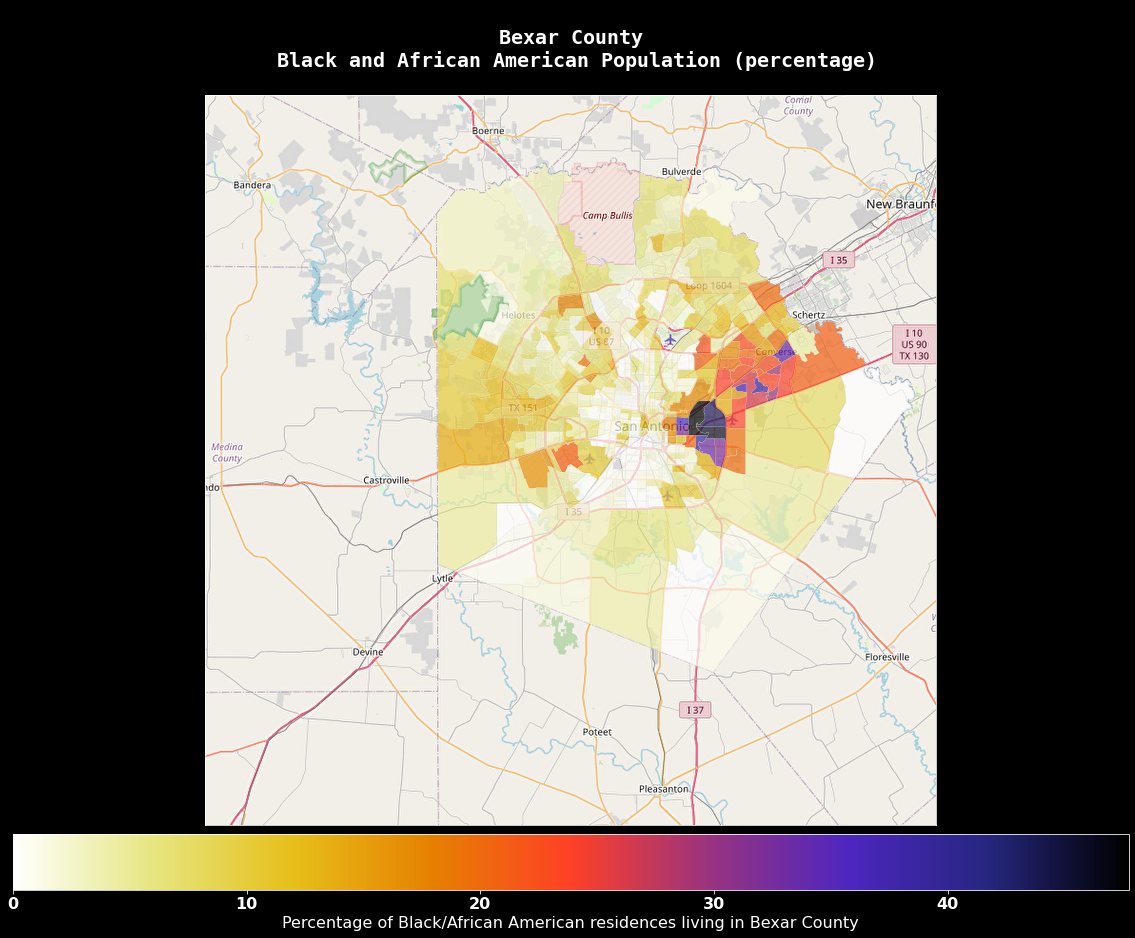

In [15]:
f,ax = plt.subplots(1,1, figsize=(20,16))

plt.rcParams['legend.title_fontsize'] = 'medium'

plt.rcParams['font.size'] = 16

plt.rcParams['font.weight'] = 600

ax.imshow(bx_race_black_basemap, extent=bx_race_black_extent, interpolation='sinc')
bx_race_black['pct_black'] = bx_race_black.eval('B02001_003E / B02001_001E')*100  # type: ignore

bx_race_black.plot('pct_black', edgecolor='white',linewidth=.2, cmap='CMRmap_r', ax = ax,  # type: ignore
                    alpha=.7, legend=True,
                    legend_kwds={ 'label': "Percentage of Black/African American residences living in Bexar County",'orientation': "horizontal", 'pad':.01})  # type: ignore

plt.title(
    "\nBexar County\n Black and African American Population (percentage)\n",
    fontsize=20,
    loc='center',
    fontweight='bold',
    #style='italic',
    family='monospace')

plt.style.use('dark_background')

ax.tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)